In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sqlite3
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
# Loading red and white datasets
red_wine_df = pd.read_csv("./Resources/winequality-red.csv", delimiter=";")
white_wine_df = pd.read_csv("./Resources/winequality-white.csv", delimiter=";")

# Adding columns to distinguish between white and red wines
red_wine_df['type'] = 'Red'
white_wine_df['type'] = 'White'

# Combining the red and white DataFrames
wine_df = pd.concat([red_wine_df, white_wine_df])

# Creating SQLite database and saving the DataFrame
conn = sqlite3.connect('wine_quality.db')
wine_df.to_sql('wine_quality', conn, if_exists='replace', index=False)

# Retrieve the data from the database
query = "SELECT * FROM wine_quality"
wine_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

print("Data has been successfully saved to wine_quality.db")

Data has been successfully saved to wine_quality.db


In [30]:
# Data cleaning, normalization, and standardization
# Drop any rows with missing values (if any)
wine_df.dropna(inplace=True)

# Separate features and target variable
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

# Encode the 'type' column using one-hot encoding.
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['type'])
    ],
    remainder='passthrough' 
)
X_transformed = column_transformer.fit_transform(X)

# Standardization and normalization of the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [31]:
#Print red_wine data
red_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  Red  
1      9.8        5  Red  
2      9.8        5  Red  
3      9.8        6  Red  
4      9.4        5  Red

In [32]:
#print white wine data
white_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  White  
1      9.5        6  White  
2     10.1        6  White  
3      9.9        6  White  
4      9.9        6  White

In [33]:
#describe the data frame
red_wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [34]:
#describe the data frame
white_wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

<Axes: >

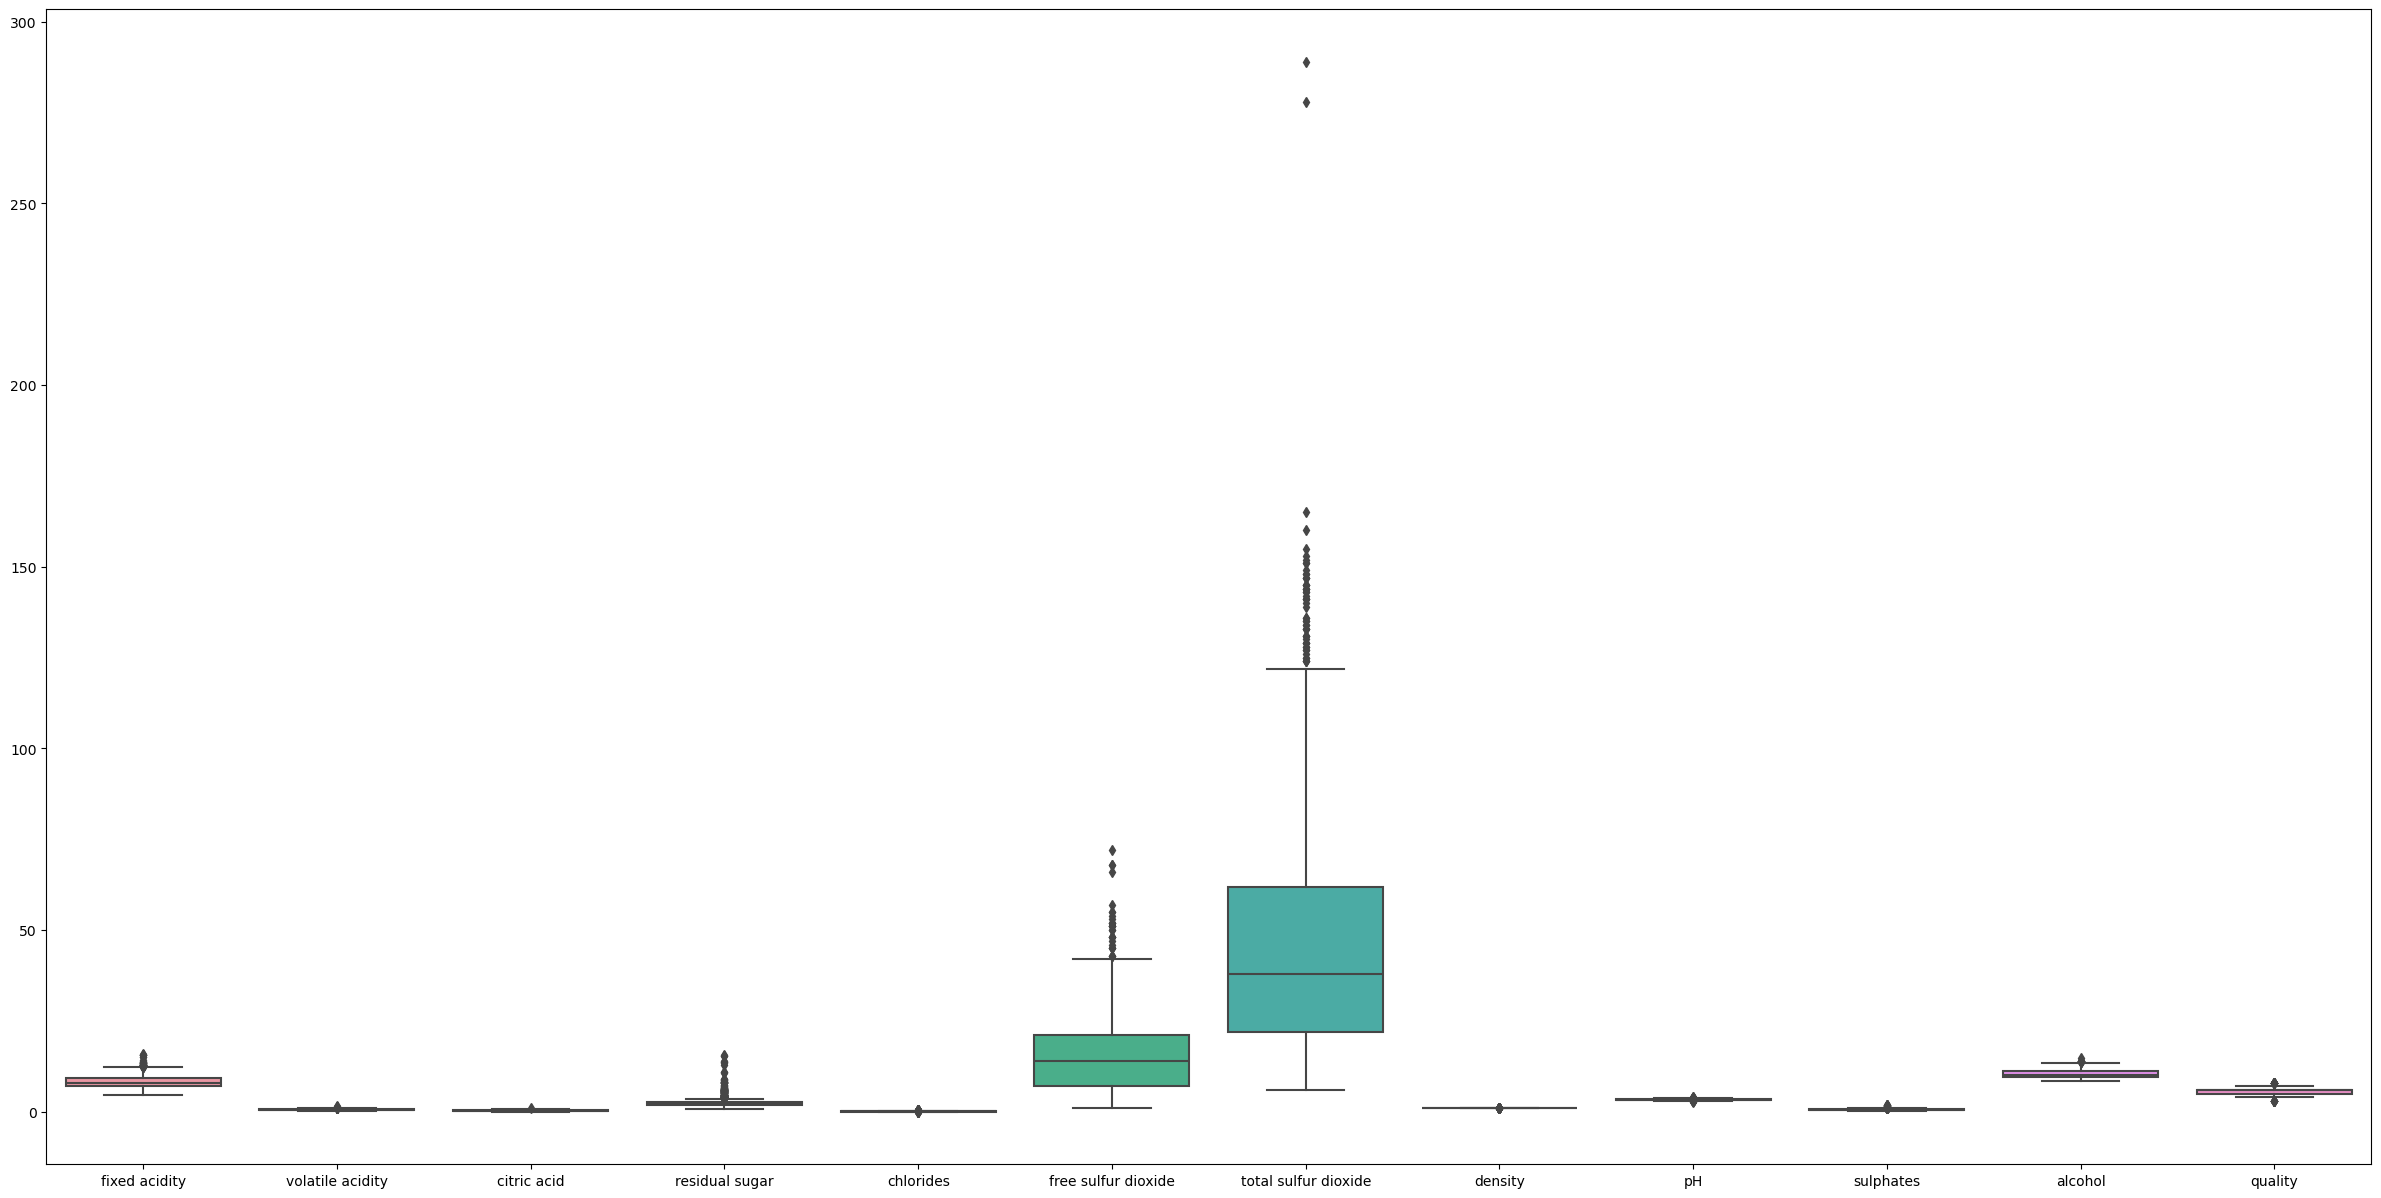

In [35]:
#Plot the data in a box plot
plt.figure(figsize=(30, 15))
sns.boxplot (data=red_wine_df)

<Axes: >

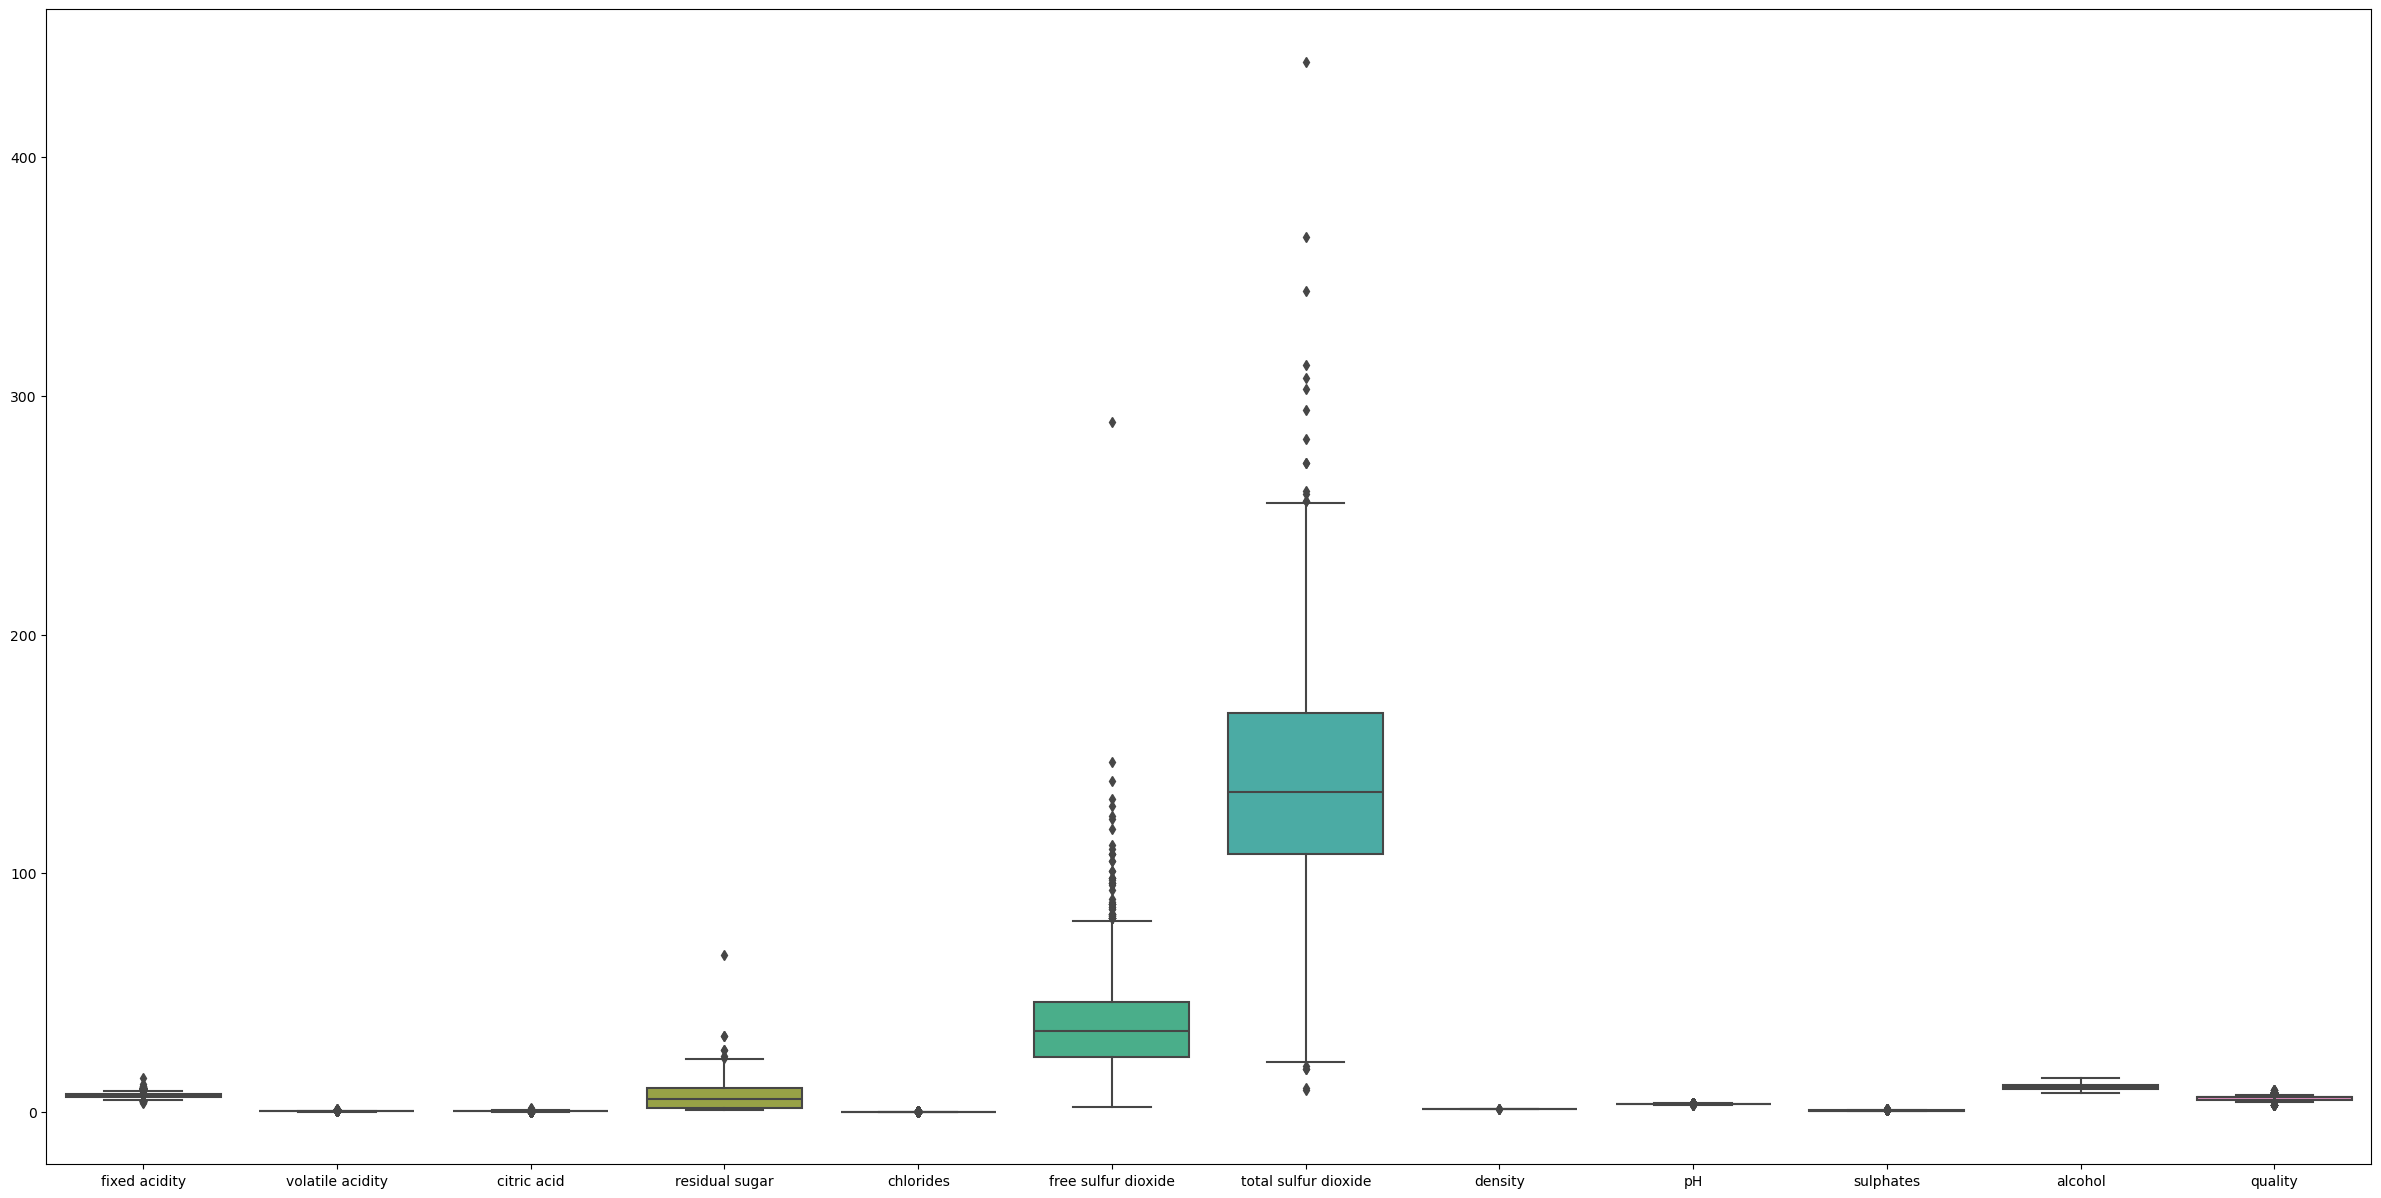

In [36]:
#Plot the data in a box plot
plt.figure(figsize=(30, 15))
sns.boxplot (data=white_wine_df)

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3000x1500 with 0 Axes>

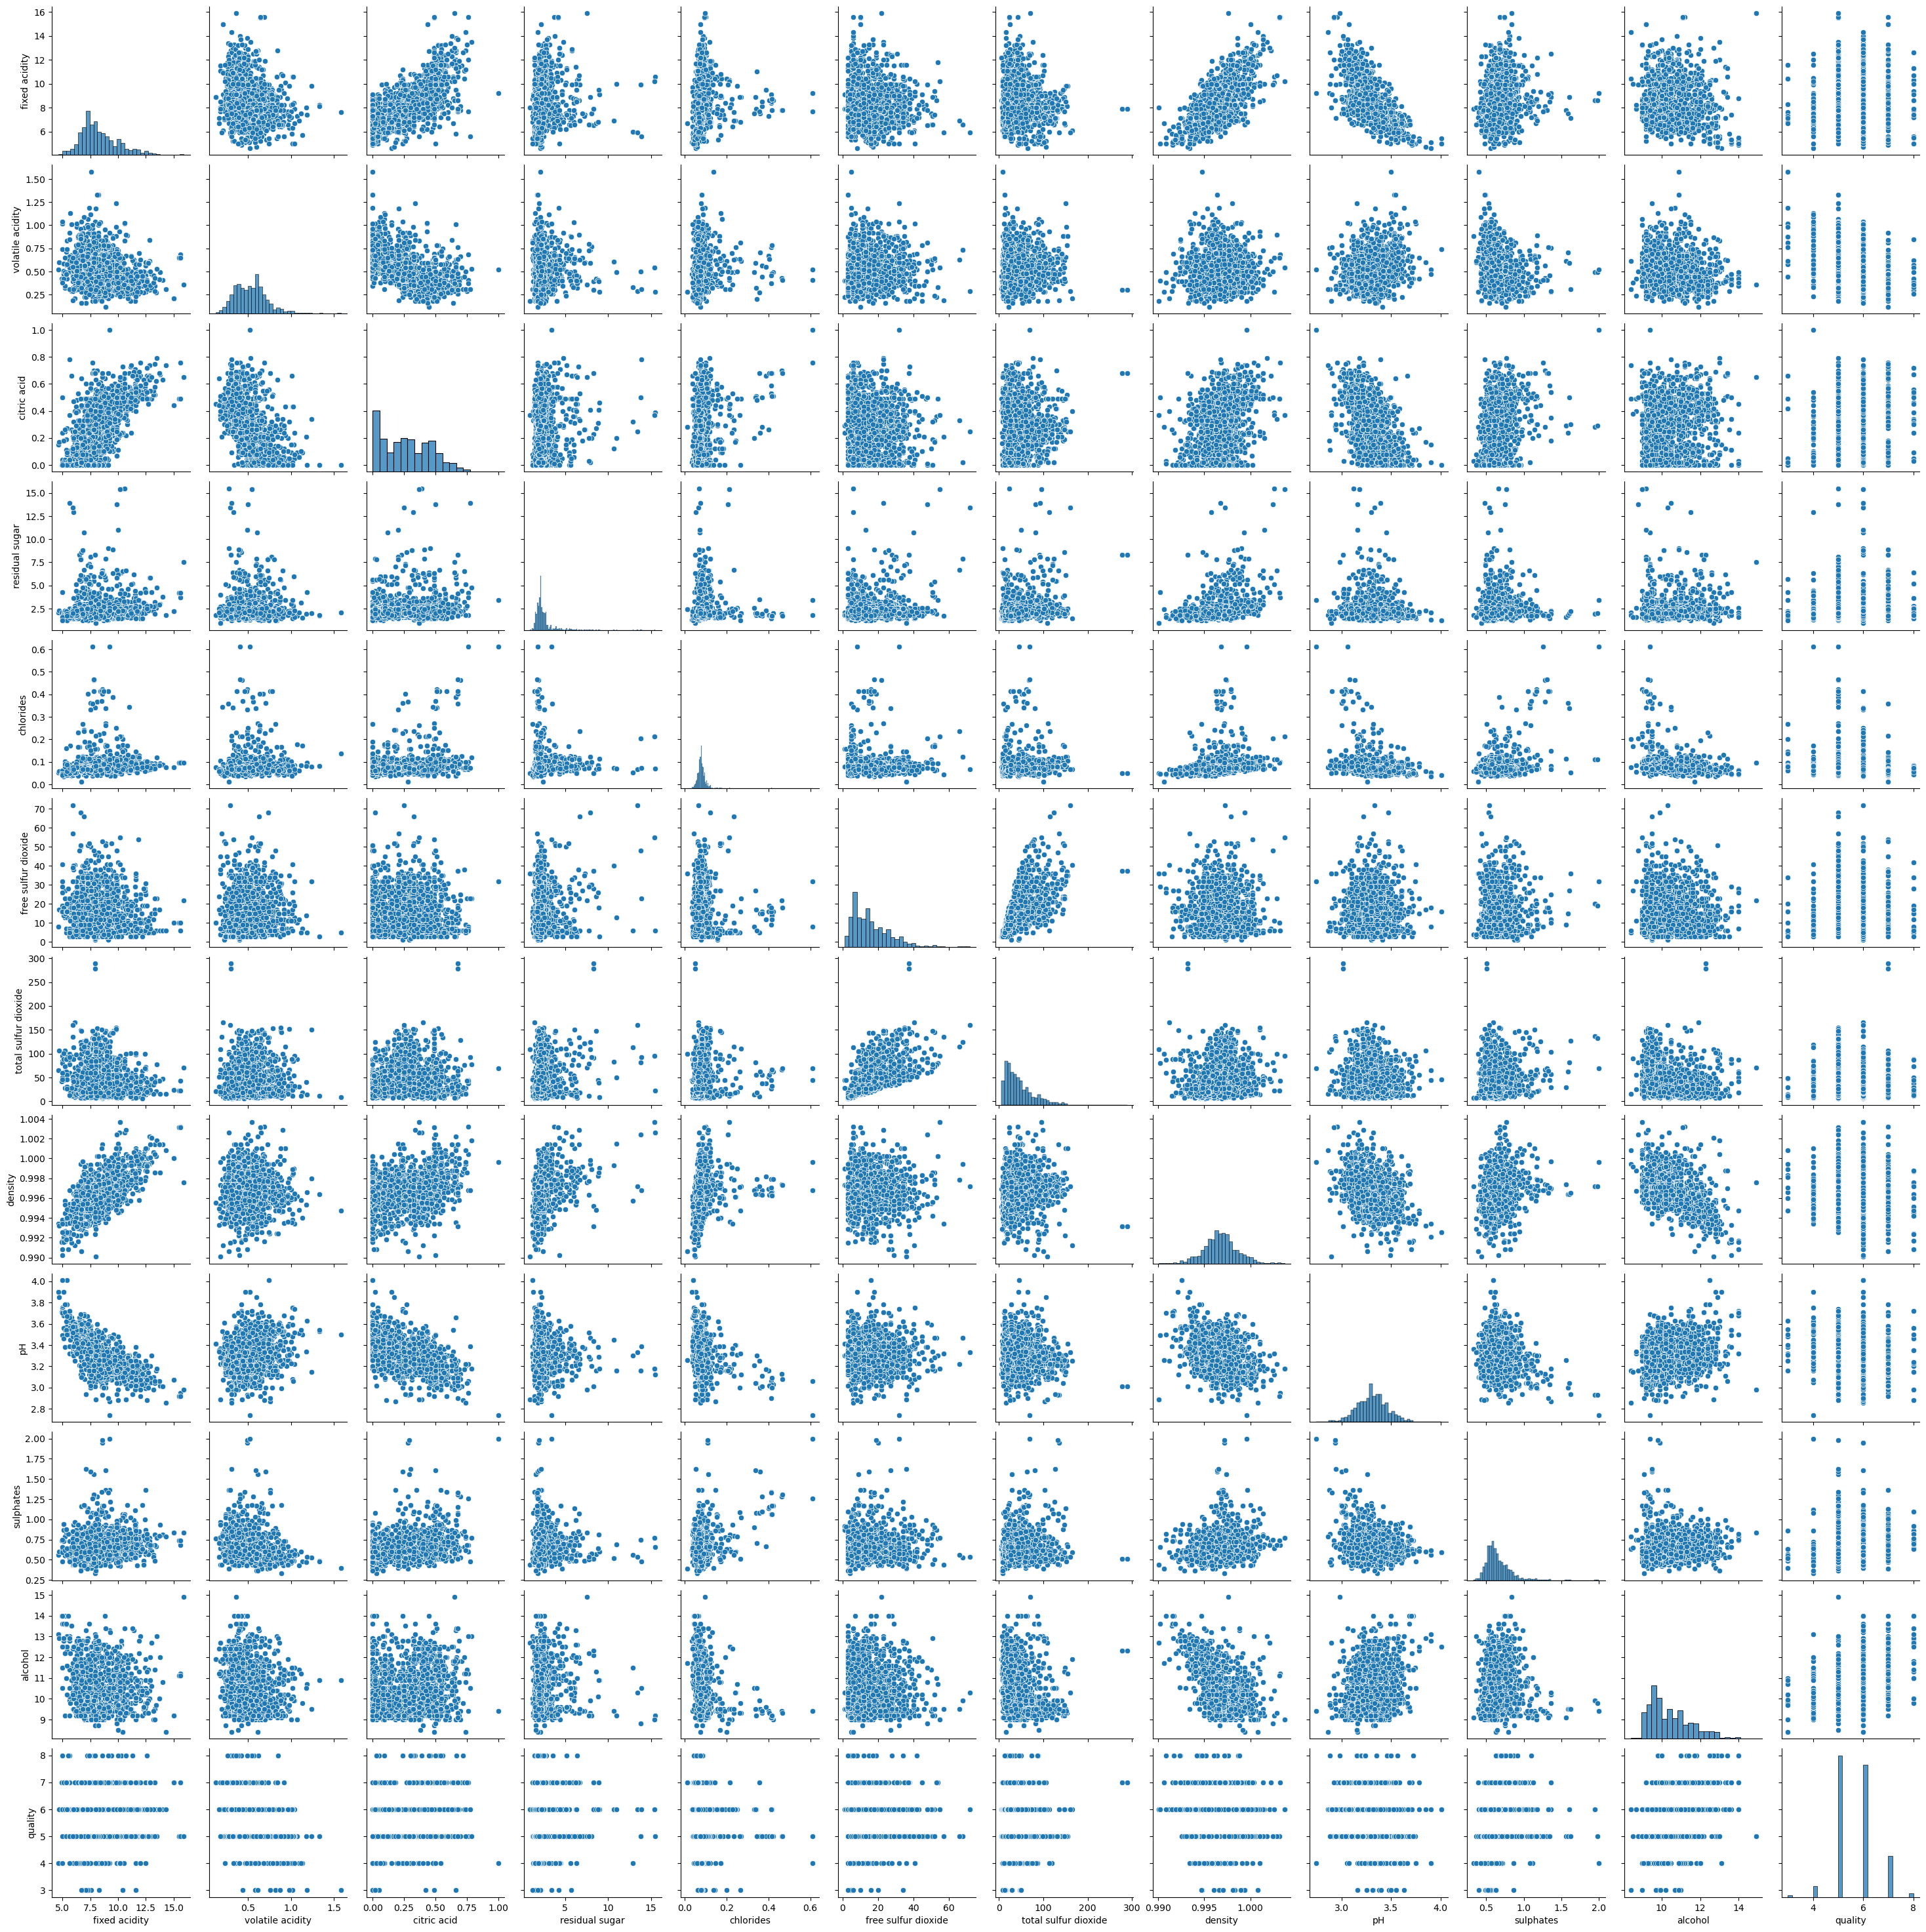

In [37]:
# Multivariate Analysis
plt.figure(figsize=(30, 15))
sns.pairplot(data=red_wine_df)
plt.show

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3000x1500 with 0 Axes>

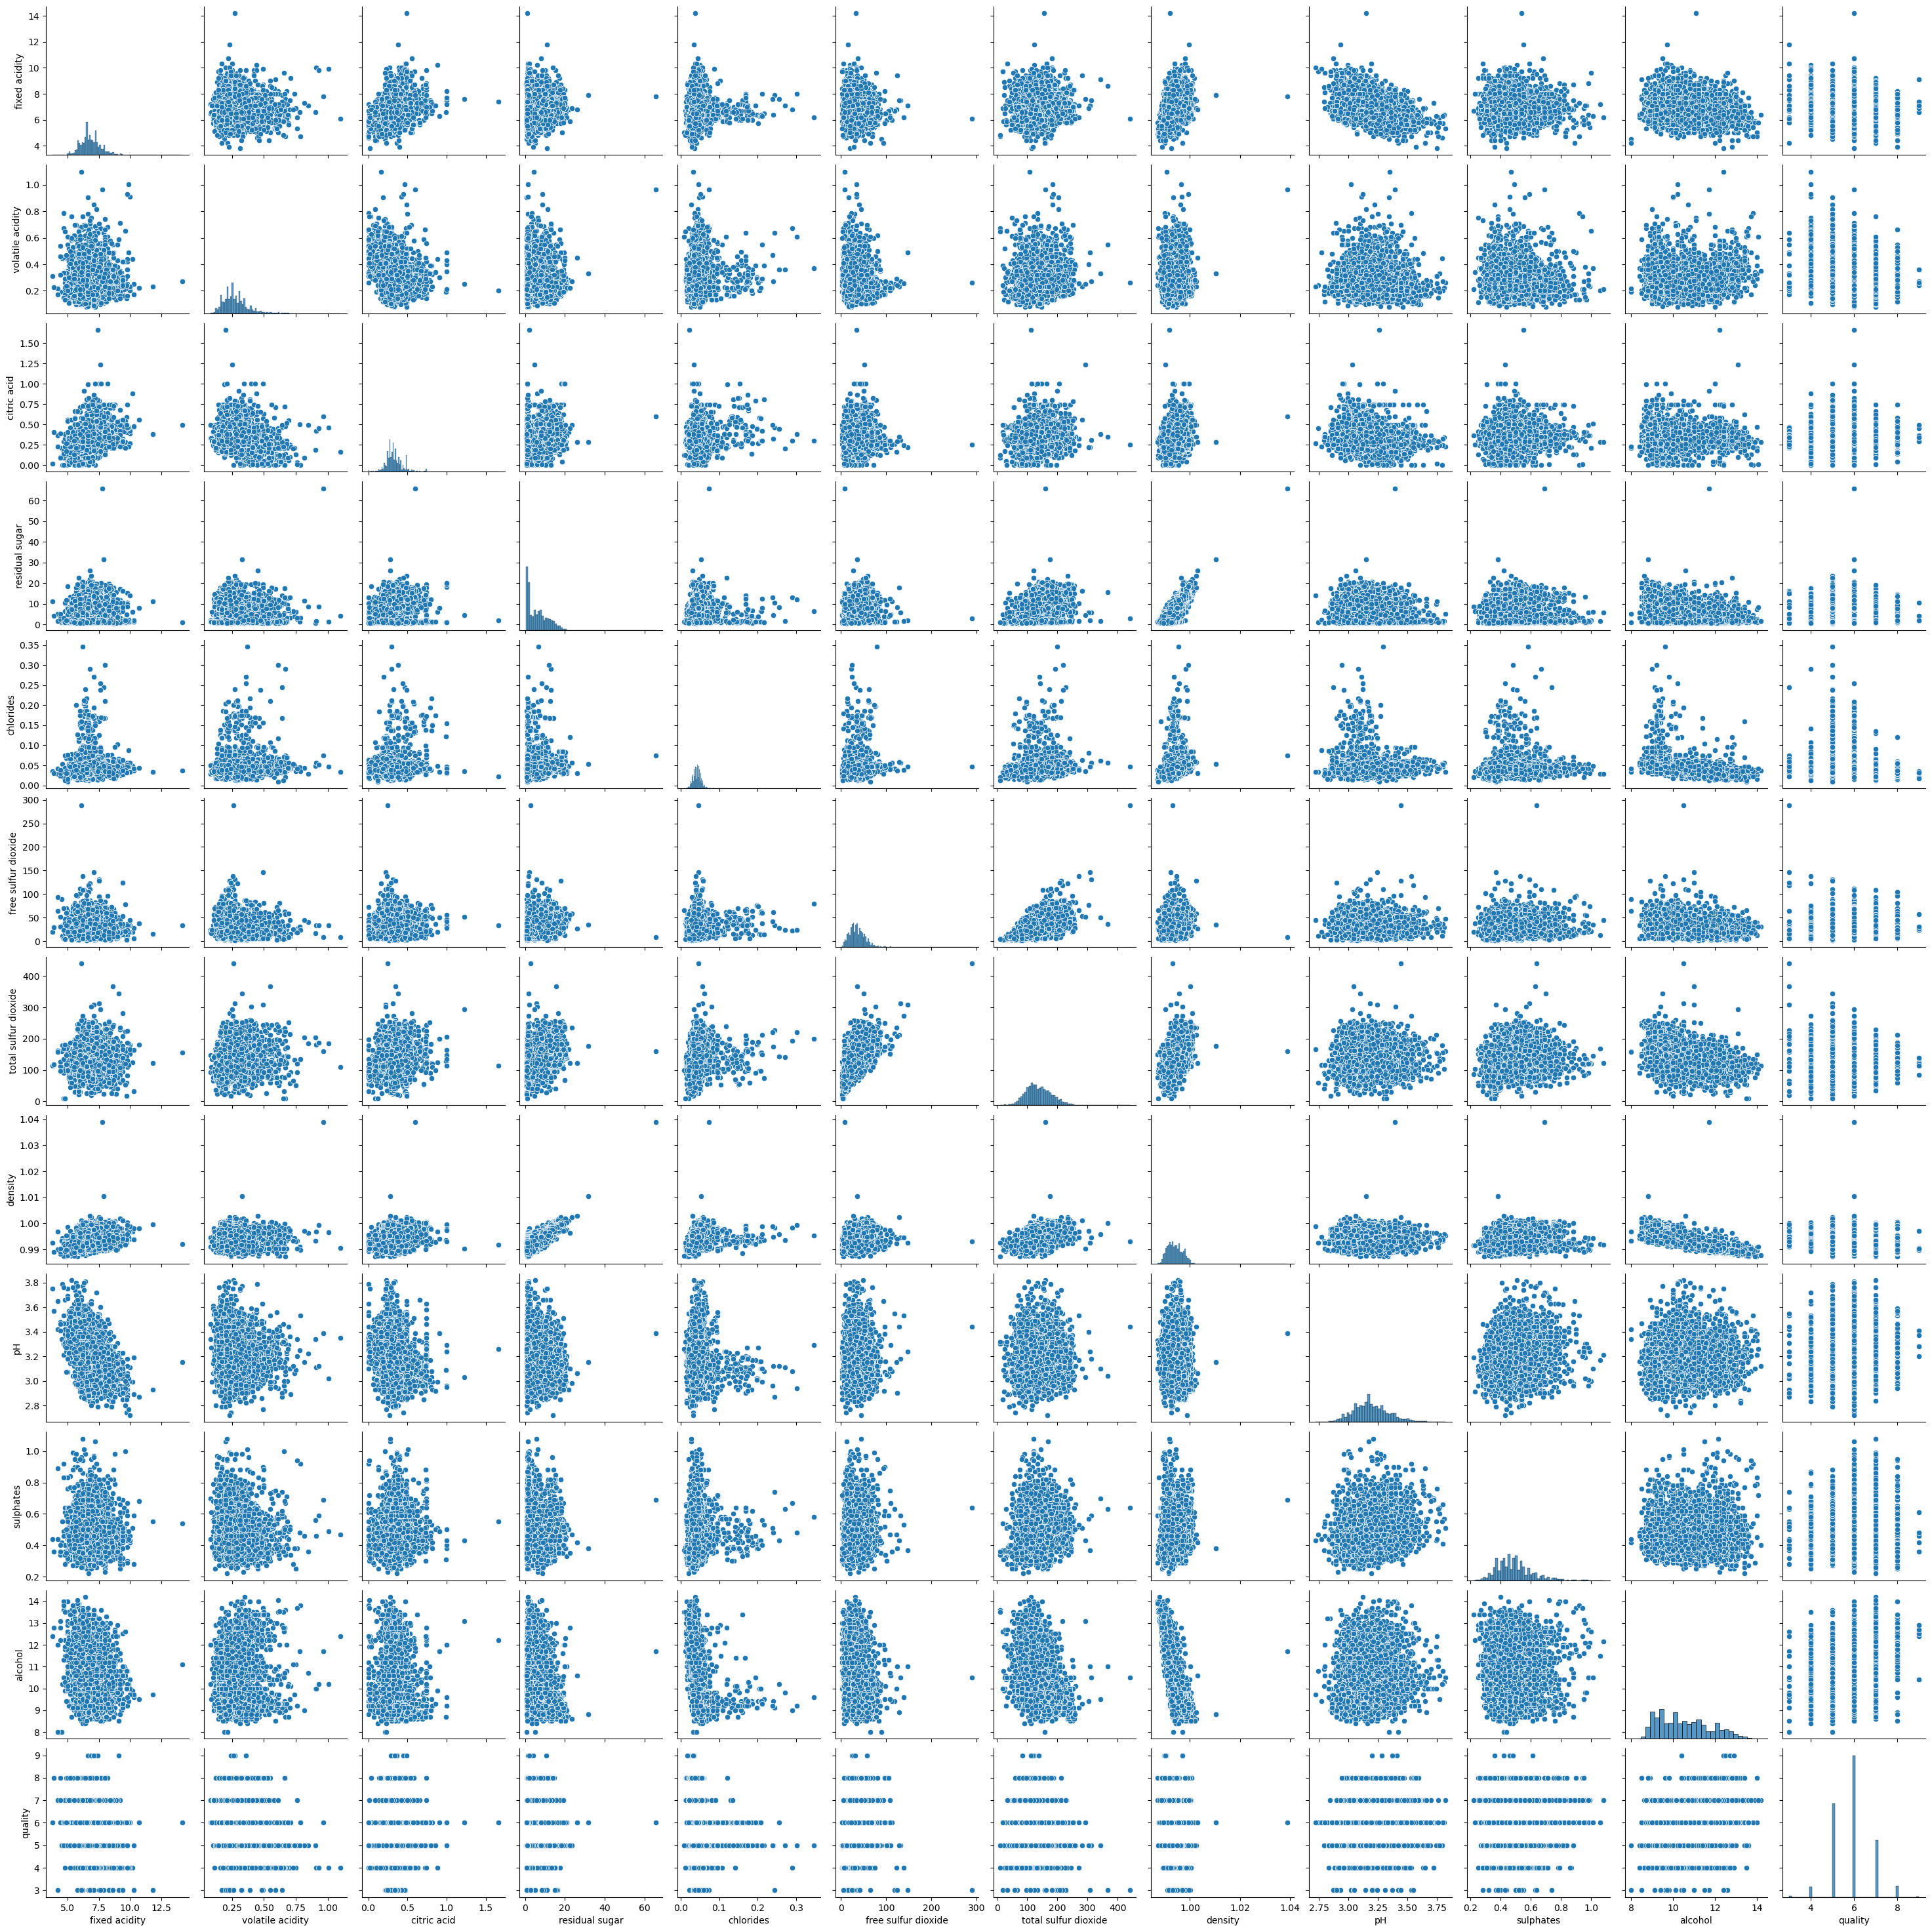

In [38]:
# Multivariate Analysis
plt.figure(figsize=(30, 15))
sns.pairplot(data=white_wine_df)
plt.show


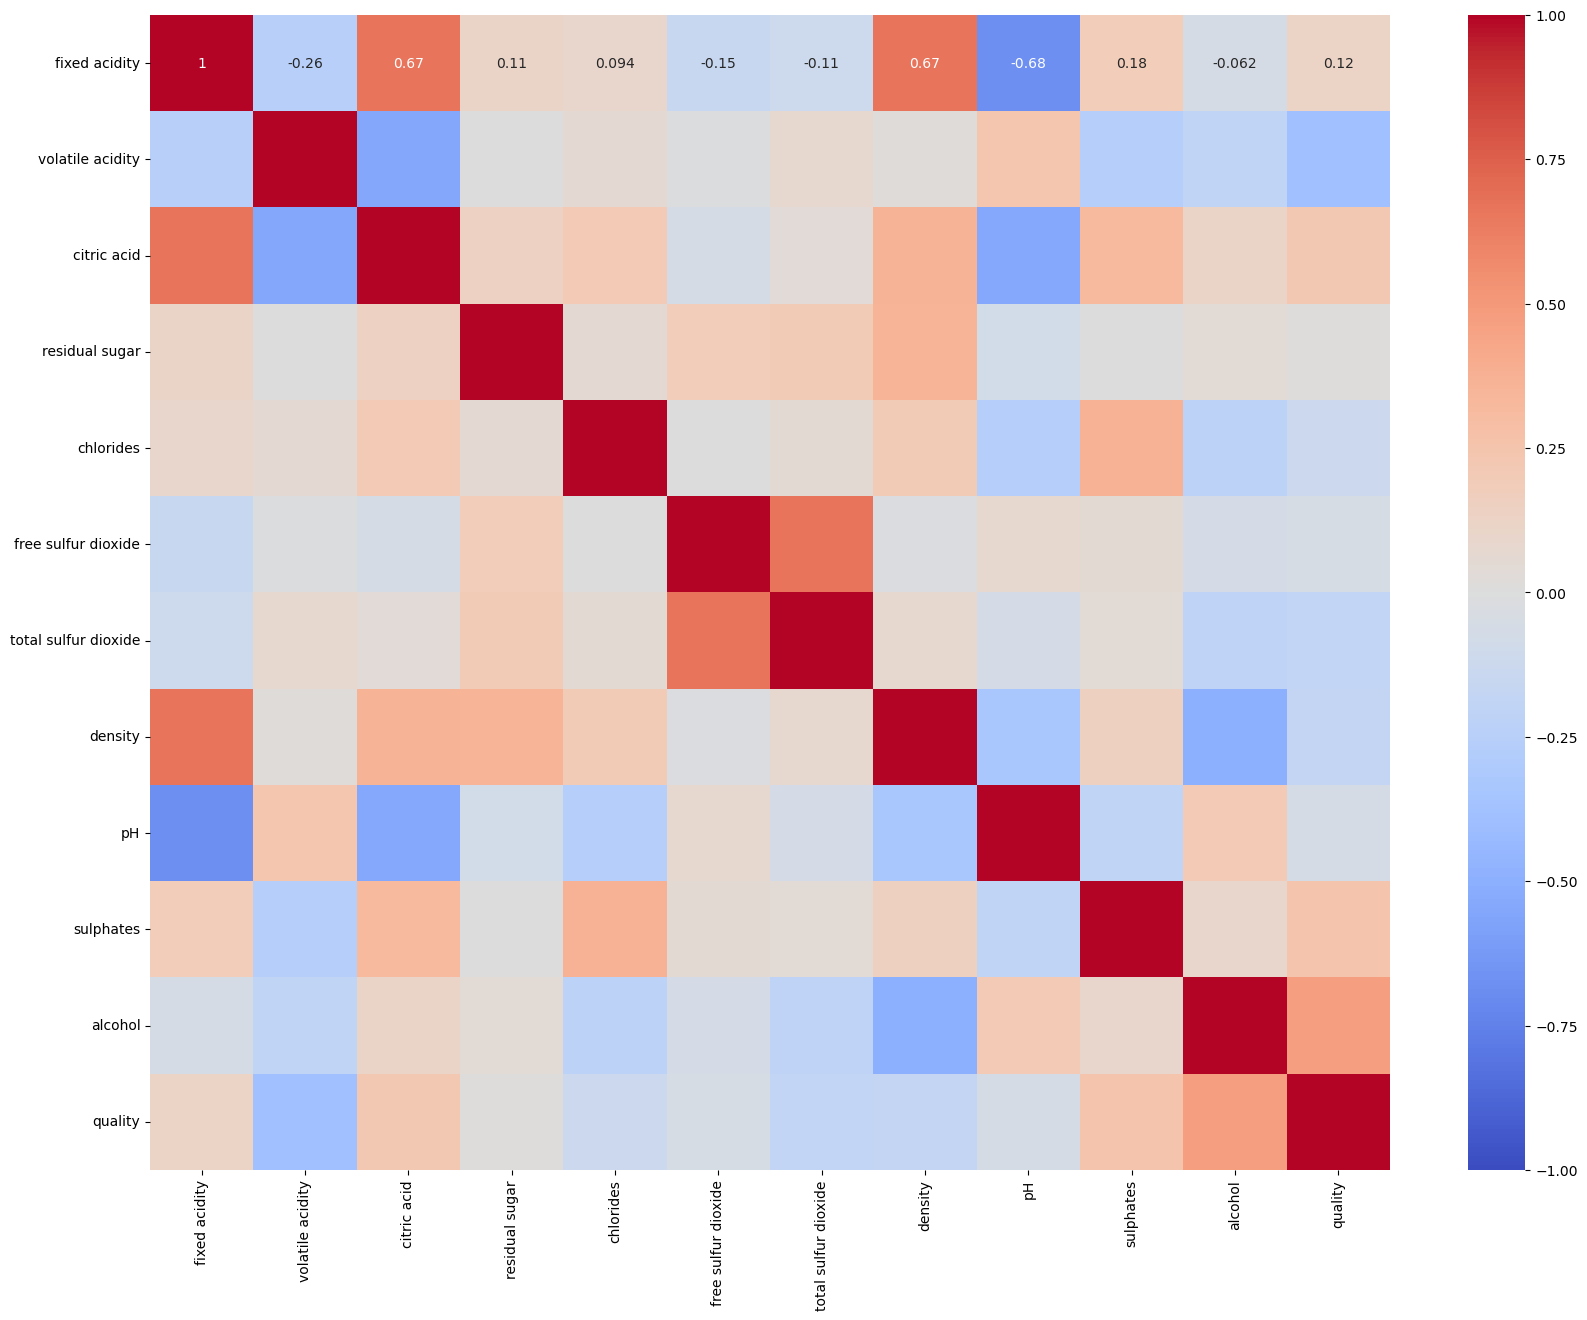

In [39]:
# Heatmap
numeric_red_wine_df = red_wine_df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_red_wine_df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

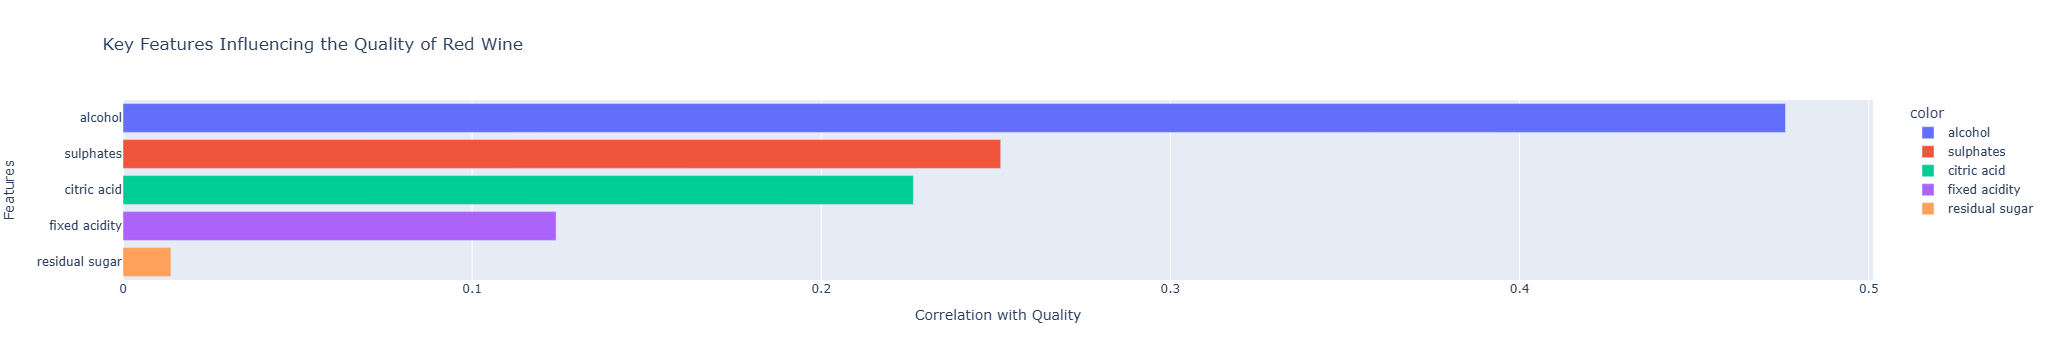

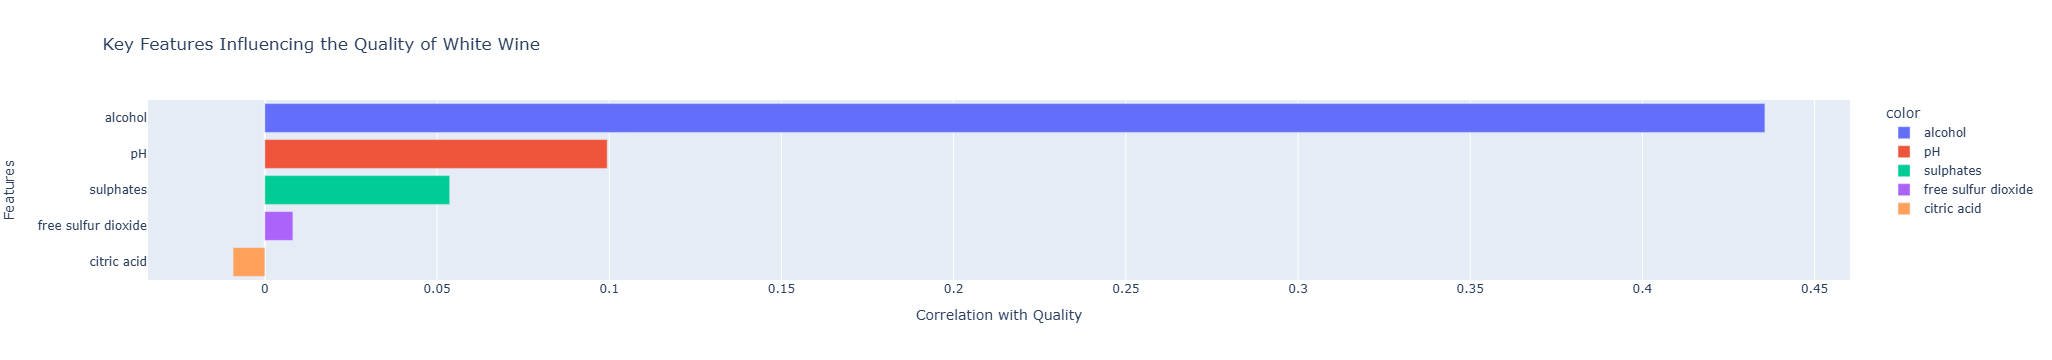

In [40]:
import plotly.express as px
import plotly.io as pio
# Remove/Drop non numerical columns in red_wine_df
n_numeric_columns = red_wine_df.select_dtypes(include=['object']).columns
red_wine_df = red_wine_df.drop(columns=n_numeric_columns)

# Correlation between quality and red wine
correlation = red_wine_df.corr()['quality'].sort_values(ascending=False)
top_features = correlation.index[1:6] 

# Interactive bar plot for red wine
plot_red = px.bar(
    x=correlation[top_features],
    y=top_features,
    orientation='h',
    labels={'x': 'Correlation with Quality', 'y': 'Features'},
    title='Key Features Influencing the Quality of Red Wine',
    color=top_features,
    color_continuous_scale='Reds'
)

plot_red.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

# Show plot
plot_red.show()

# Remove/Drop non numerical columns in white_wine_df 
n_numeric_columns = white_wine_df.select_dtypes(include=['object']).columns
white_wine_df = white_wine_df.drop(columns=n_numeric_columns)

#Correlation between white wine quality
correlation = white_wine_df.corr()['quality'].sort_values(ascending=False)
top_features = correlation.index[1:6]  

# Interactive bar plot for white wine
plot_white = px.bar(
    x=correlation[top_features],
    y=top_features,
    orientation='h',
    labels={'x': 'Correlation with Quality', 'y': 'Features'},
    title='Key Features Influencing the Quality of White Wine',
    color=top_features,
    color_continuous_scale='Blues'
)

plot_white.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

# Show plot
plot_white.show()


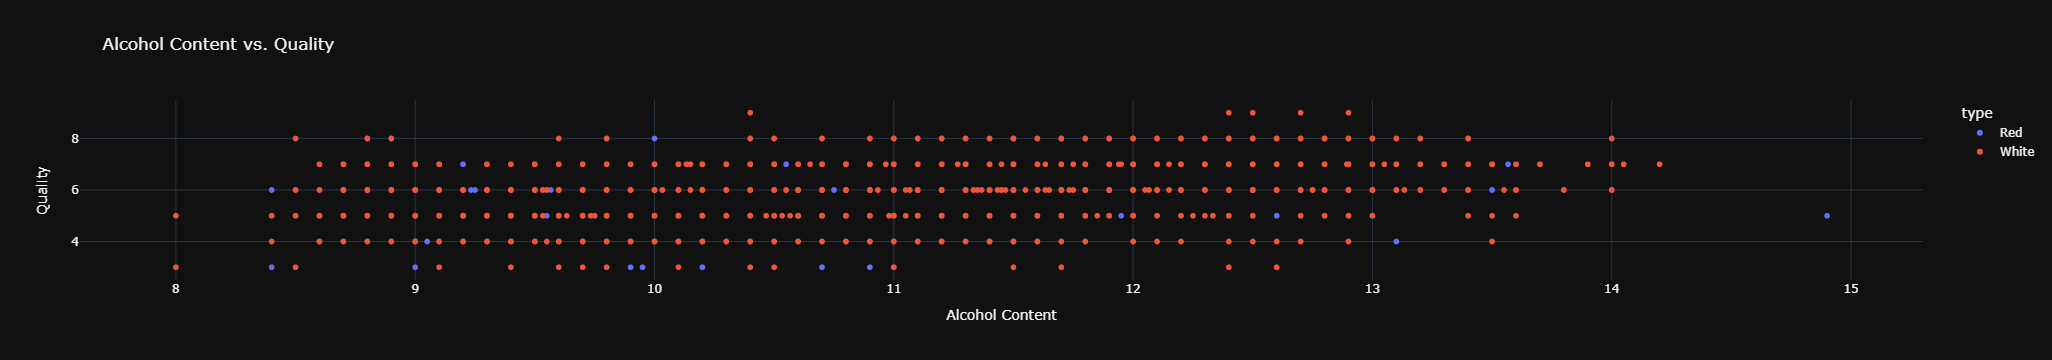

In [27]:
#Comparative analysis between white and red wines
red_wine_df['type'] = 'Red'
white_wine_df['type'] = 'White'
wine_df = pd.concat([red_wine_df, white_wine_df])

#Alcohol vs Quality Scatter Plot Interactivity
fig = px.scatter(wine_df, x='alcohol', y='quality', color='type', 
                 title='Alcohol Content vs. Quality',
                 labels={'alcohol': 'Alcohol Content', 'quality': 'Quality'},
                 template='plotly_dark')

fig.show()

In [45]:
#Importing further libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
#setting up a binary indentifier for quality, choosing 7 and above to determine a good quality wine
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        0  Red  
1      9.8        0  Red  
2      9.8        0  Red  
3      9.8        0  Red  
4      9.4        0  Red

In [47]:
#Counting how many "good" wines
good_wines = wine_df[wine_df['quality'] == 1]

quality_counts = good_wines['quality'].count()
print(quality_counts)

0


In [48]:
#Separating the features from the target, target being wine quality (y), features being all other columns
#dropping wine type as this is not a distinguishing feature
wine_df.dropna()
X = wine_df.drop(['quality', 'type'], axis = 1)
y = wine_df['quality']

In [49]:
#splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Scaling the features to make them standardised
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Training a Random Forrest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Predictions from the test set
y_prediction = model.predict(X_test)

#Evaluating model effectiveness with confusion matrix and classification report
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[1300]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



C:\Users\dinna\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

